# Student Performance Prediction

In [1]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

Exploratory Data Analysis

In [2]:
data = pd.read_csv("Student_Performance.csv")
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
data.tail()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


From the Student performance dataset, we can get Hours Studied, Previous Scores, Extracurricular Activities, Sleep Hours, Sample Question Papers Practiced as independent column. Performance Index as dependent and targeted column. We have to find the r2_score percentage because the target column has continuous values and using that we have to predict student performance.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [5]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [7]:
data.shape

(10000, 6)

Data Visualization

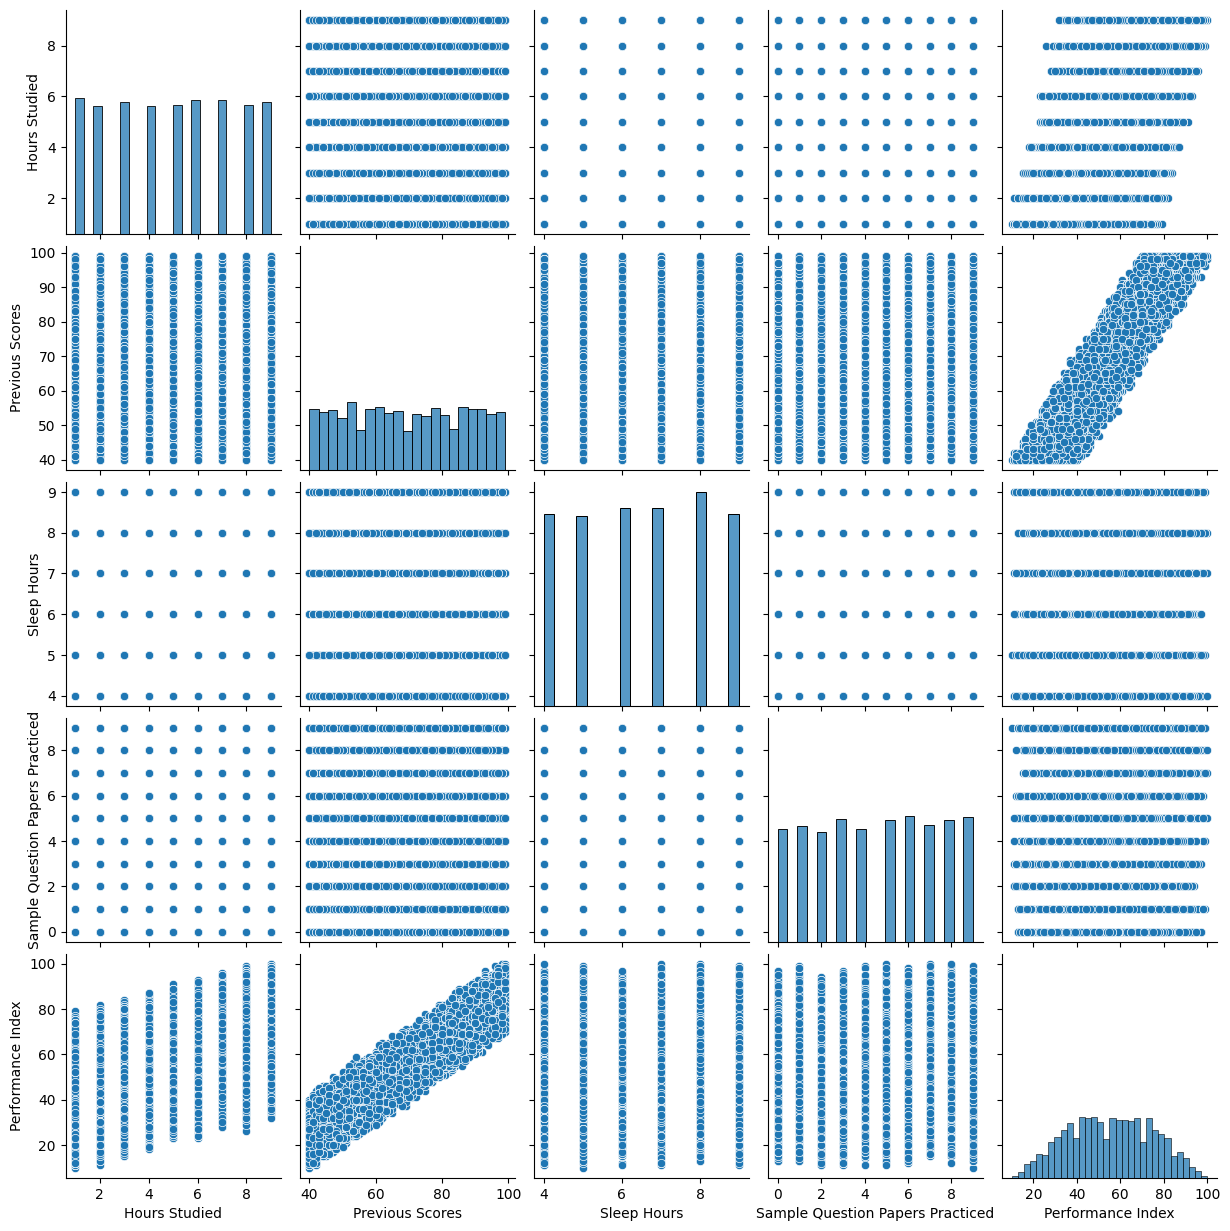

In [8]:
sns.pairplot(data=data)          #data visualization using pairplot

Text(0.5, 1.0, 'No. of students studied for no. of hours')

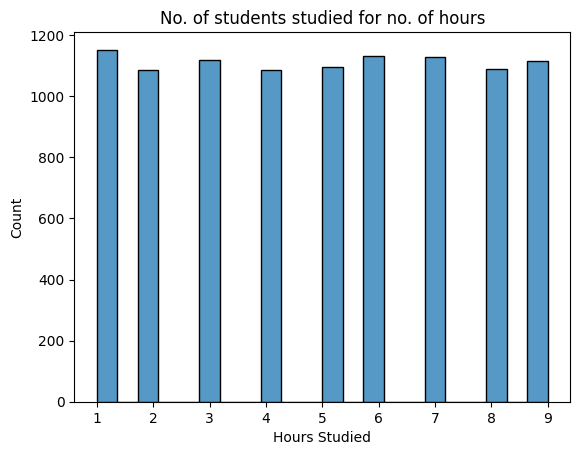

In [9]:
sns.histplot(data=data, x='Hours Studied')      #histogram of the column 'Hours Studied'
plt.title('No. of students studied for no. of hours')

Text(0.5, 1.0, 'No. of students involved in Extracurricular Activities')

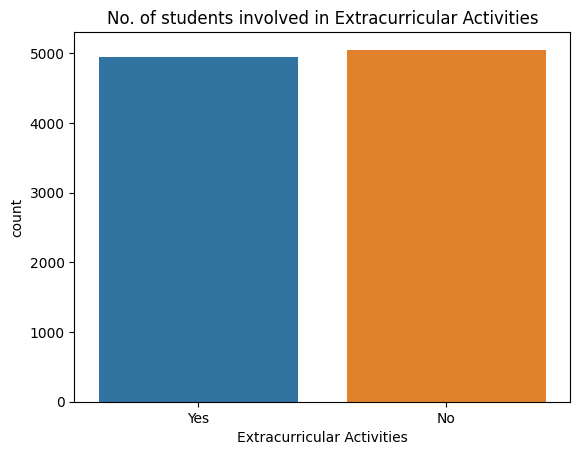

In [10]:
sns.countplot(data=data, x='Extracurricular Activities')           #countplot of the column 'Extracurricular Activities'
plt.title('No. of students involved in Extracurricular Activities')

From the above graph, we can conclude that more people are not involved in Extracurricular activities

Text(0.5, 1.0, 'Bar plot between Extracurricular Activities and Performance Index')

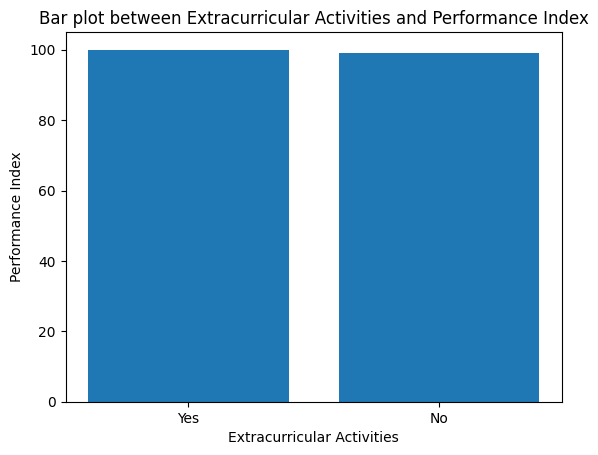

In [11]:
plt.bar(data['Extracurricular Activities'], data['Performance Index'])
plt.xlabel('Extracurricular Activities')
plt.ylabel('Performance Index')
plt.title('Bar plot between Extracurricular Activities and Performance Index')    #comparing 'Extracurricular activities' to the 'performance index'

From the above graph, we can conclude that majority of student scoring above 95 is more likely to invlove in extra curricular activities

Text(0.5, 1.0, 'Scatterplot between Hours Studied and Performance Index')

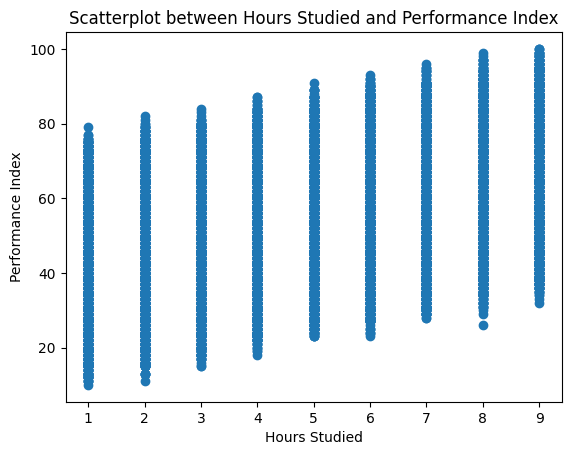

In [12]:
plt.scatter(data['Hours Studied'], data['Performance Index'])
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Scatterplot between Hours Studied and Performance Index')    #comparing 'Hours studied' to the 'performance index'

From the above graph, we can conclude that more the hours studied more will be the student performance

Text(0.5, 1.0, 'Scatterplot between Sample Question Papers Practiced and Performance Index')

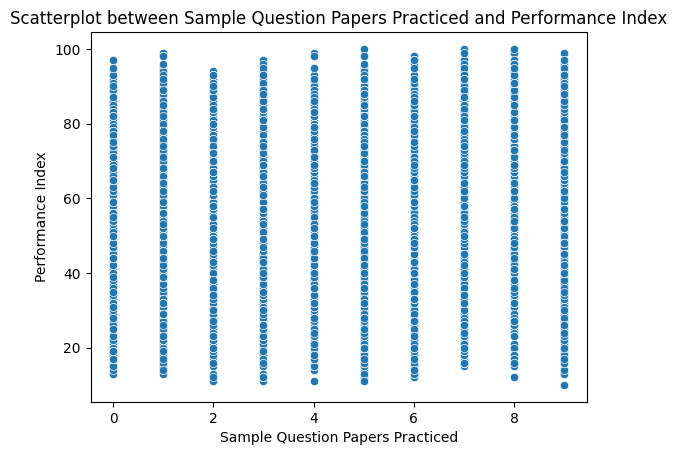

In [13]:
sns.scatterplot(data=data, x='Sample Question Papers Practiced', y='Performance Index')   #comparing 'Sample question papers practiced' to the 'performance index'
plt.title('Scatterplot between Sample Question Papers Practiced and Performance Index')

From the above graph, we can conclude that practising question papers is not making impact on student performance

In [14]:
data['Sample Question Papers Practiced'].mean()   #From this, average no. of papers a student solve to perform is 5 papers

4.5833

In [15]:
data['Sleep Hours'].mean()     #From this, average sleep time for a student to perform is around 7 hours

6.5306

Text(0.5, 1.0, 'Scatterplot between Previous Scores Practiced and Performance Index')

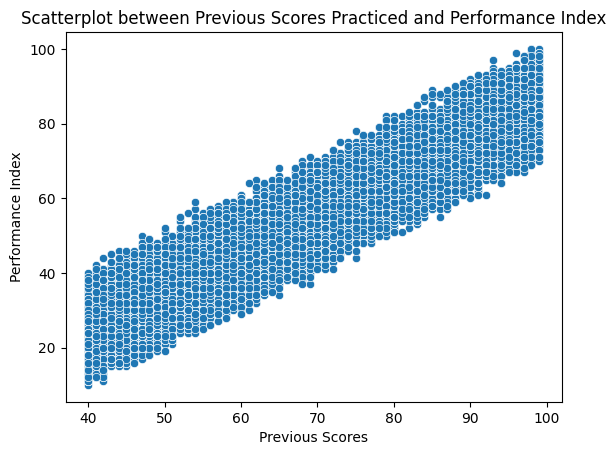

In [16]:
sns.scatterplot(data=data, x='Previous Scores', y='Performance Index')   #scatterplot betwwen 'Previous Scores' and 'Performance Index'
plt.title('Scatterplot between Previous Scores Practiced and Performance Index')

Data Preprocessing

In [17]:
encode = LabelEncoder()
data['Extracurricular Activities'] = encode.fit_transform(data['Extracurricular Activities'])    #Encoding the dataset

Train Dataset

In [18]:
x=data.drop('Performance Index', axis=1)
y=data['Performance Index']                   #Assigning x and y variables

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 20)   #spliting the dataset using train and test

Model Development

In [20]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), KNeighborsRegressor()]

In [21]:
for model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r_sq_score= r2_score(y_test, y_pred)
    print(f"{model} :- \t R2 Score = {r_sq_score:.2f}")

LinearRegression() :- 	 R2 Score = 0.99
DecisionTreeRegressor() :- 	 R2 Score = 0.97
RandomForestRegressor() :- 	 R2 Score = 0.99
KNeighborsRegressor() :- 	 R2 Score = 0.98


We are choosing the model which gives more r2 score percentage. So we are going with LinearRegression

In [22]:
reg = LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)

In [23]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print('mse value: ', mse)
print('mae value: ', mae)

mse value:  4.094075945505768
mae value:  1.6055528066914622


From this, we can conclude that the model is able to correctly predict the student performance with an accuracy of 99%